# My everyday Python code
- Basics
    - Python
- Data manipulation
    - Pandas
- Visualization
    - Matplotlib & Seaborn
    - Scikit-learn
- Utilities
    - Numpy
- Tools
    - Jupyter notebook / lab

# Python
- PrettyPrinter & Filter / Map
- Multiprocessing
- Counter
- Current datetime
- Pickle

In [1]:
import os
import nltk

## PrettyPrinter & Filter / Map

In [2]:
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4)

In [3]:
test_print = [(i, 2*i, 3*i) for i in range(200)]
print(len(test_print), test_print[:10])
print("----- Filter -----")
test_print_even = list(filter(lambda x: x[0] % 2 == 0, test_print))
print(len(test_print_even), test_print_even[:10])

test_print_even_power = list(map(lambda x: (x[0], x[1] ** 2, x[2] ** 4), test_print_even))

print("----- With print -----")
print(test_print_even_power[:10])
print("----- With pprint -----")
pp.pprint(test_print_even_power[:10])

200 [(0, 0, 0), (1, 2, 3), (2, 4, 6), (3, 6, 9), (4, 8, 12), (5, 10, 15), (6, 12, 18), (7, 14, 21), (8, 16, 24), (9, 18, 27)]
----- Filter -----
100 [(0, 0, 0), (2, 4, 6), (4, 8, 12), (6, 12, 18), (8, 16, 24), (10, 20, 30), (12, 24, 36), (14, 28, 42), (16, 32, 48), (18, 36, 54)]
----- With print -----
[(0, 0, 0), (2, 16, 1296), (4, 64, 20736), (6, 144, 104976), (8, 256, 331776), (10, 400, 810000), (12, 576, 1679616), (14, 784, 3111696), (16, 1024, 5308416), (18, 1296, 8503056)]
----- With pprint -----
[   (0, 0, 0),
    (2, 16, 1296),
    (4, 64, 20736),
    (6, 144, 104976),
    (8, 256, 331776),
    (10, 400, 810000),
    (12, 576, 1679616),
    (14, 784, 3111696),
    (16, 1024, 5308416),
    (18, 1296, 8503056)]


## Glob

In [4]:
import glob

data_path_pattern = '20news-19997/20_newsgroups/*/*'
data_paths = glob.glob(data_path_pattern)
pp.pprint(data_paths[:10])

[   '20news-19997/20_newsgroups/rec.motorcycles/104606',
    '20news-19997/20_newsgroups/rec.motorcycles/104381',
    '20news-19997/20_newsgroups/rec.motorcycles/104798',
    '20news-19997/20_newsgroups/rec.motorcycles/105236',
    '20news-19997/20_newsgroups/rec.motorcycles/104307',
    '20news-19997/20_newsgroups/rec.motorcycles/105125',
    '20news-19997/20_newsgroups/rec.motorcycles/104731',
    '20news-19997/20_newsgroups/rec.motorcycles/104696',
    '20news-19997/20_newsgroups/rec.motorcycles/104516',
    '20news-19997/20_newsgroups/rec.motorcycles/104494']


## Multiprocessing


In [5]:
from multiprocessing import Pool

def read_and_tokenize(filepath):
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            text = f.read()
    except UnicodeDecodeError:
        text = ''
    except FileNotFoundError:
        text = ''
    return nltk.pos_tag(nltk.word_tokenize(text))

In [6]:
%%time
n_cpus = os.cpu_count()
with Pool(n_cpus) as p:
    tagged_files = p.map(read_and_tokenize, data_paths)
    p.close()
    p.join()

CPU times: user 2.97 s, sys: 779 ms, total: 3.75 s
Wall time: 2min 5s


In [7]:
%%time
tagged_files = [read_and_tokenize(fpath) for fpath in data_paths]

CPU times: user 5min 34s, sys: 1.1 s, total: 5min 35s
Wall time: 5min 35s


In [8]:
pp.pprint(tagged_files[0][:10])

[   ('Newsgroups', 'NNS'),
    (':', ':'),
    ('rec.motorcycles', 'NNS'),
    ('Path', 'NNP'),
    (':', ':'),
    ('cantaloupe.srv.cs.cmu.edu', 'NN'),
    ('!', '.'),
    ('das-news.harvard.edu', 'NN'),
    ('!', '.'),
    ('noc.near.net', 'NN')]


## Counter

In [9]:
from collections import Counter

cc = Counter()
for tagged_file in tagged_files:
    words = [word for word, _ in tagged_file]
    cc.update(words)
pp.pprint(cc.most_common(10))

[   ('>', 327196),
    (':', 307266),
    (',', 303667),
    ('.', 251231),
    ('!', 230193),
    ('the', 225483),
    ('--', 185469),
    ('@', 150729),
    ('to', 124878),
    (')', 123829)]


## Current datetime

In [10]:
import datetime
cTime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(cTime)

2019-12-28 19:02:15


## Pickle

In [11]:
import pickle

pickle_save_path = 'tagged_files_%s.pkl' % cTime

with open(pickle_save_path, 'wb') as f:
    pickle.dump(tagged_files, f)

with open(pickle_save_path, 'rb') as f:
    loaded_tagged_files = pickle.load(f)

print(len(loaded_tagged_files))
pp.pprint(loaded_tagged_files[0][:10])

19997
[   ('Newsgroups', 'NNS'),
    (':', ':'),
    ('rec.motorcycles', 'NNS'),
    ('Path', 'NNP'),
    (':', ':'),
    ('cantaloupe.srv.cs.cmu.edu', 'NN'),
    ('!', '.'),
    ('das-news.harvard.edu', 'NN'),
    ('!', '.'),
    ('noc.near.net', 'NN')]


# Pandas
- iterrows & load data
- head / tail / sample
- iterrows()
- groupby -> agg
- concat (axis=0, axis=1)
- apply + more than one arg

## Iterrows & load data

In [1]:
import pandas as pd

from itertools import product

filepath = 'iris/iris.data'

parts = ['sepal', 'petal']
axes = ['width', 'height']

# [('sepal', 'width'), ('sepal', 'height'), ('petal', 'width'), ('petal', 'height')]
parts_axes = list(product(parts, axes))
print(parts_axes)
columns = list(map(lambda x: '%s_%s' % (x[0], x[1]), parts_axes)) + ['class']

df = pd.read_csv(filepath, names=columns)

[('sepal', 'width'), ('sepal', 'height'), ('petal', 'width'), ('petal', 'height')]


## Head, Tail, Sample

In [13]:
df.head()

,sepal_width,sepal_height,petal_width,petal_height,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.tail()

,sepal_width,sepal_height,petal_width,petal_height,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
df.sample(5, random_state=2)

,sepal_width,sepal_height,petal_width,petal_height,class
6,4.6,3.4,1.4,0.3,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
12,4.8,3.0,1.4,0.1,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa


## Iterrows

In [55]:
idx_and_rows = list(df.sample(10).iterrows())
for idx, row in idx_and_rows:
    print(idx, row['sepal_width'], row['class'])

118 7.7 Iris-virginica
15 5.7 Iris-setosa
69 5.6 Iris-versicolor
63 6.1 Iris-versicolor
34 4.9 Iris-setosa
119 6.0 Iris-virginica
134 6.1 Iris-virginica
25 5.0 Iris-setosa
114 5.8 Iris-virginica
97 6.2 Iris-versicolor


## Groupby + agg

In [17]:
df.groupby('class').agg(list)

,sepal_width,sepal_height,petal_width,petal_height
class,,,,
Iris-setosa,"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, ...","[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, ...","[1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, ...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, ..."
Iris-versicolor,"[7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, ...","[3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, ...","[4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, ...","[1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, ..."
Iris-virginica,"[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, ...","[3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, ...","[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, ...","[2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, ..."


In [18]:
df.groupby('class').agg(['max', 'min', 'sum', list])

sepal_width              \
                        max  min    sum   
class                                     
Iris-setosa             5.8  4.3  250.3   
Iris-versicolor         7.0  4.9  296.8   
Iris-virginica          7.9  4.9  329.4   

                                                                    \
                                                              list   
class                                                                
Iris-setosa      [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, ...   
Iris-versicolor  [7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, ...   
Iris-virginica   [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, ...   

                sepal_height              \
                         max  min    sum   
class                                      
Iris-setosa              4.4  2.3  170.9   
Iris-versicolor          3.4  2.0  138.5   
Iris-virginica           3.8  2.2  148.7   

                                                                    \
                                                              list   
class                                                                
Iris-setosa      [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, ...   
Iris-versicolor  [3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, ...   
Iris-virginica   [3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, ...   

                petal_width              \
                        max  min    sum   
class                                     
Iris-setosa             1.9  1.0   73.2   
Iris-versicolor         5.1  3.0  213.0   
Iris-virginica          6.9  4.5  277.6   

                                                                    \
                                                              list   
class                                                                
Iris-setosa      [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, ...   
Iris-versicolor  [4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, ...   
Iris-virginica   [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, ...   

                petal_height              \
                         max  min    sum   
class                                      
Iris-setosa              0.6  0.1   12.2   
Iris-versicolor          1.8  1.0   66.3   
Iris-virginica           2.5  1.4  101.3   

                                                                    
                                                              list  
class                                                               
Iris-setosa      [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, ...  
Iris-versicolor  [1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, ...  
Iris-virginica   [2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, ...

## Concat

In [19]:
# concat
df_head = df.head()
df_tail = df.tail()

In [20]:
# concat (append row)
pd.concat([df_head, df_tail], axis=0)

,sepal_width,sepal_height,petal_width,petal_height,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [21]:
# concat (append column)
pd.concat([df_head, df_tail], axis=1)

,sepal_width,sepal_height,petal_width,petal_height,class,sepal_width,sepal_height,petal_width,petal_height,class
0,5.1,3.5,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN,NaN
1,4.9,3.0,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN,NaN
2,4.7,3.2,1.3,0.2,Iris-setosa,NaN,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2,Iris-setosa,NaN,NaN,NaN,NaN,NaN
4,5.0,3.6,1.4,0.2,Iris-setosa,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,NaN,NaN,NaN,6.7,3.0,5.2,2.3,Iris-virginica
146,NaN,NaN,NaN,NaN,NaN,6.3,2.5,5.0,1.9,Iris-virginica
147,NaN,NaN,NaN,NaN,NaN,6.5,3.0,5.2,2.0,Iris-virginica
148,NaN,NaN,NaN,NaN,NaN,6.2,3.4,5.4,2.3,Iris-virginica
149,NaN,NaN,NaN,NaN,NaN,5.9,3.0,5.1,1.8,Iris-virginica


In [22]:
# should reset index before appending columns
pd.concat([df_head.reset_index(drop=True), df_tail.reset_index(drop=True)], axis=1)

,sepal_width,sepal_height,petal_width,petal_height,class,sepal_width,sepal_height,petal_width,petal_height,class
0,5.1,3.5,1.4,0.2,Iris-setosa,6.7,3.0,5.2,2.3,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-setosa,6.3,2.5,5.0,1.9,Iris-virginica
2,4.7,3.2,1.3,0.2,Iris-setosa,6.5,3.0,5.2,2.0,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa,6.2,3.4,5.4,2.3,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa,5.9,3.0,5.1,1.8,Iris-virginica


# Matplotlib & Seaborn
- standard plot: multiple axes + title + legend + sharex + sharey
- scatterplot
- distplot
- pairplot

In [2]:
import matplotlib.pyplot as plt

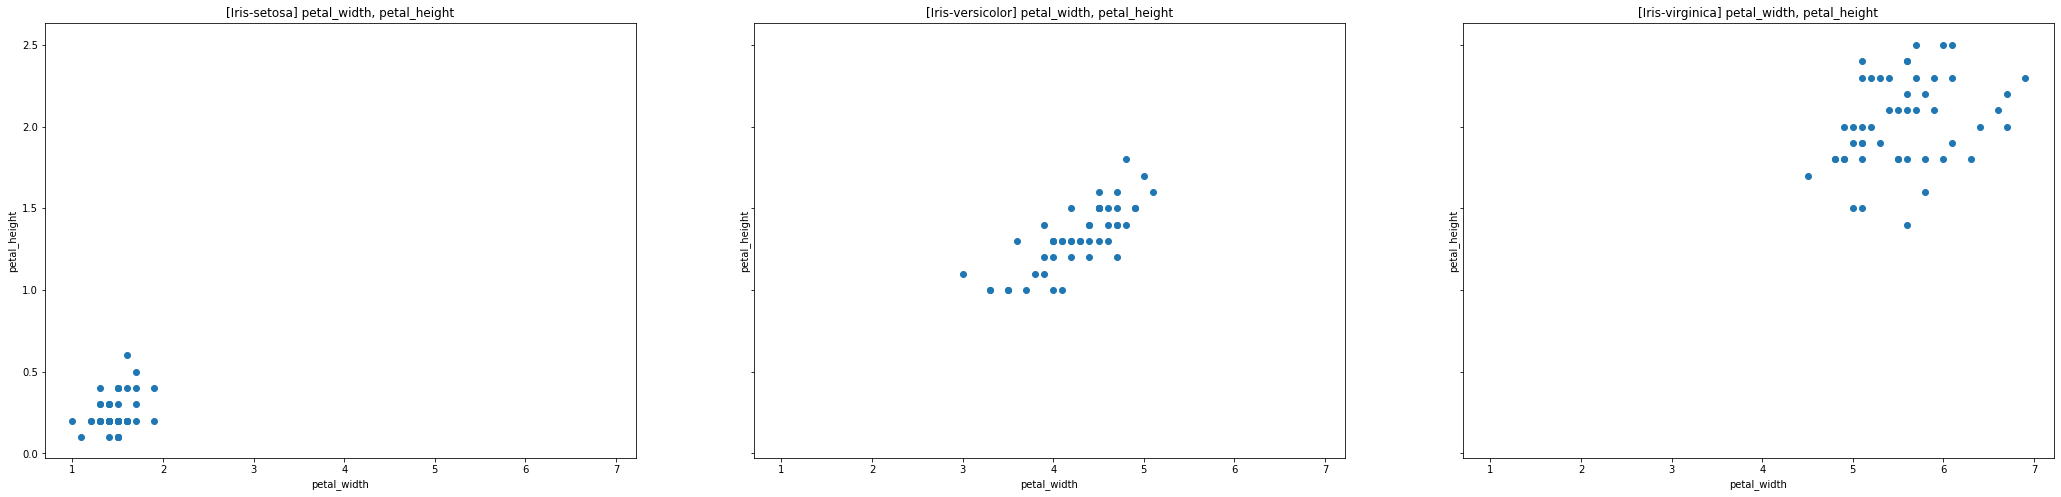

In [4]:
# matplotlib

n_cols = n_classes = df['class'].unique().shape[0]
n_rows = 1

_, axs = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(12 * n_classes, 8))

# petal width, height
plot_cols = columns[2:4]

for cls_name, ax in zip(df['class'].unique(), axs):
    df_cls = df[df['class'] == cls_name]
    x = df_cls[plot_cols[0]]
    y = df_cls[plot_cols[1]]
    ax.scatter(x, y)
    ax.set_title('[%s] %s' % (cls_name, ', '.join(plot_cols)))    
    ax.set_xlabel(plot_cols[0])
    ax.set_ylabel(plot_cols[1])

In [25]:
import seaborn as sns; sns.set(); sns.set_palette('Set1')

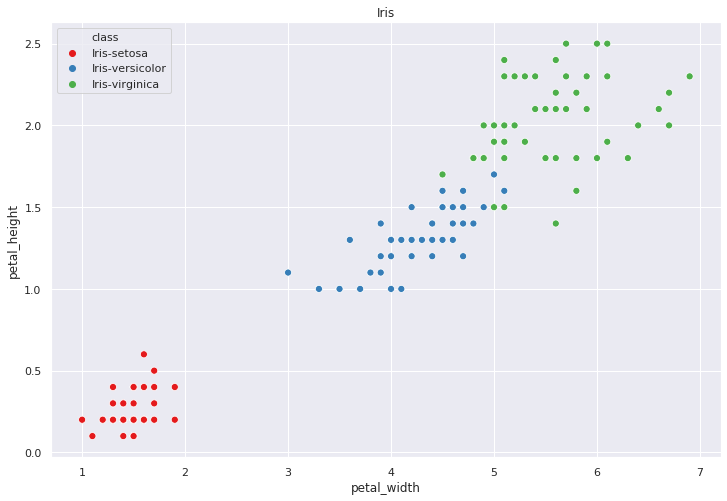

In [52]:
_, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=plot_cols[0], y=plot_cols[1], hue='class', s=50, data=df, ax=ax)
t = ax.set_title("Iris")

## Distplot

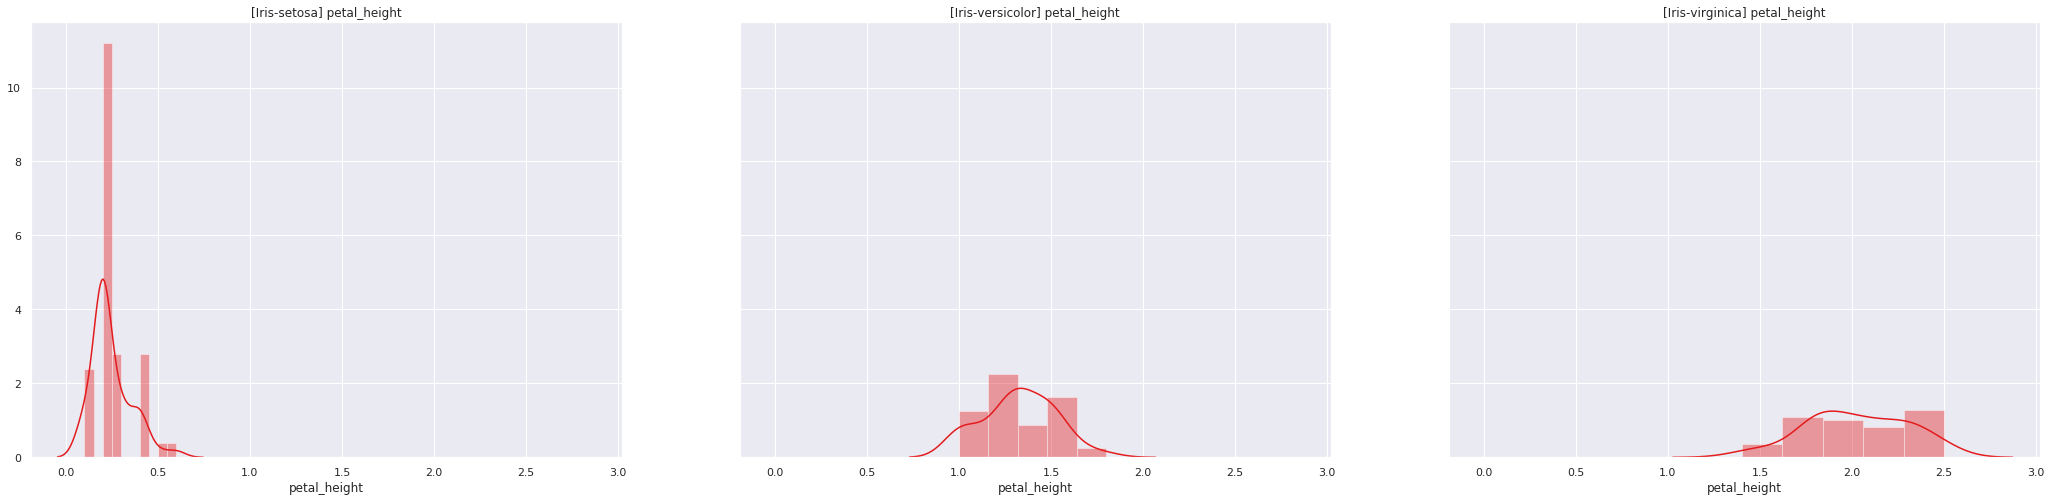

In [27]:
n_classes = df['class'].unique().shape[0]

_, axs = plt.subplots(1, n_classes, sharex=True, sharey=True, figsize=(12 * n_classes, 8))

# petal width
plot_col = columns[-2]

for cls_name, ax in zip(df['class'].unique(), axs):
    df_cls = df[df['class'] == cls_name]
    x = df_cls[plot_cols[0]]
    sns.distplot(x, ax=ax)
    ax.set_title('[%s] %s' % (cls_name, plot_col))    

## Pairplot

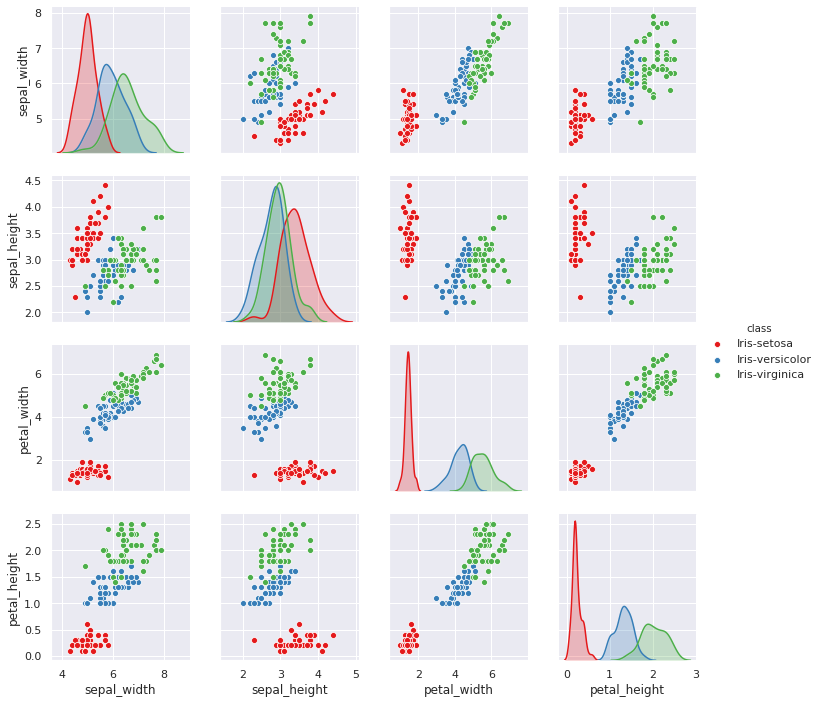

In [28]:
# pairplot
ax = sns.pairplot(data=df, hue='class')

# Scikit-learn
- TSNE & PCA

In [29]:
from sklearn.manifold import TSNE

In [30]:
X = df[df.columns[~df.columns.isin(['class'])]]
X_emb = TSNE(n_components=2).fit_transform(X)

df_tsned = pd.concat([pd.DataFrame(X_emb), df['class']], axis=1)
df_tsned.head()

,0,1,class
0,-24.125929,-9.660797,Iris-setosa
1,-21.358610,-8.930276,Iris-setosa
2,-21.628103,-10.185795,Iris-setosa
3,-21.142851,-9.838694,Iris-setosa
4,-24.155525,-10.050741,Iris-setosa


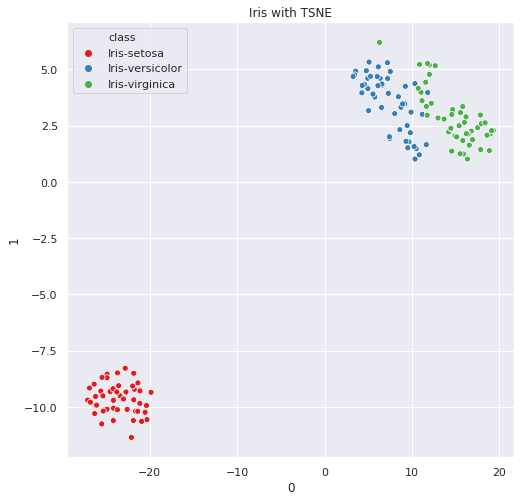

In [31]:
_, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Iris with TSNE")
ax = sns.scatterplot(x=0, y=1, hue='class', data=df_tsned)

In [32]:
from sklearn.decomposition import PCA

X = df[df.columns[~df.columns.isin(['class'])]]
X_emb = PCA(n_components=2).fit_transform(X)

df_pca = pd.concat([pd.DataFrame(X_emb), df['class']], axis=1)
df_pca.head()

,0,1,class
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


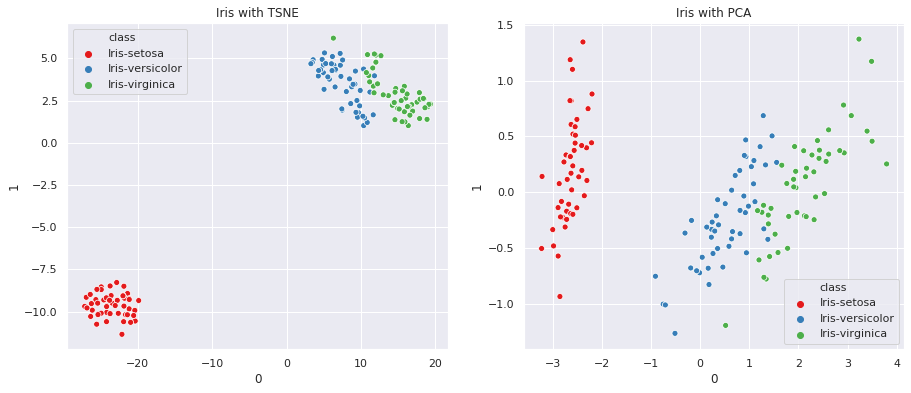

In [33]:
_, axs = plt.subplots(1, 2, figsize=(15, 6))
for name, df_, ax in zip(['TSNE', 'PCA'], [df_tsned, df_pca], axs):
    ax.set_title("Iris with %s" % name)
    ax = sns.scatterplot(x=0, y=1, hue='class', data=df_, ax=ax)

# Numpy
- np.random.rand
- np.random.shuffle
- np.argpartition

In [34]:
import numpy as np

## np.random.rand

In [35]:
arr = np.random.rand(3,2,1,4)
arr

array([[[[0.23596914, 0.63052918, 0.45262757, 0.03983192]],

        [[0.29422977, 0.3827165 , 0.178095  , 0.42658722]]],


       [[[0.36722413, 0.03945428, 0.839279  , 0.5419696 ]],

        [[0.56697374, 0.01469283, 0.91012346, 0.28484523]]],


       [[[0.5929922 , 0.28247202, 0.54765351, 0.41469043]],

        [[0.15834033, 0.56116107, 0.33979348, 0.25653011]]]])

## np.random.shuffle

In [36]:
arr = np.linspace(0, 10, num=30)
pp.pprint(arr)

array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])


In [37]:
np.random.shuffle(arr)
arr

array([ 1.03448276,  3.79310345,  4.13793103,  6.55172414,  5.51724138,
        8.62068966,  1.37931034,  2.06896552,  0.34482759,  9.31034483,
        9.65517241, 10.        ,  1.72413793,  8.96551724,  2.4137931 ,
        8.27586207,  4.48275862,  3.10344828,  5.86206897,  4.82758621,
        6.89655172,  7.24137931,  5.17241379,  3.44827586,  7.93103448,
        6.20689655,  7.5862069 ,  0.68965517,  2.75862069,  0.        ])

## np.argpartition

In [38]:
k = 5
min_k = np.argpartition(arr, k)
min_k

array([ 8, 29, 27,  0,  6, 12,  7, 14, 28,  2, 23, 17,  1, 16, 13, 15,  5,
       11, 18, 19, 20, 21, 22, 10, 24, 25, 26,  9,  3,  4])

In [39]:
arr[min_k]

array([ 0.34482759,  0.        ,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  4.13793103,
        3.44827586,  3.10344828,  3.79310345,  4.48275862,  8.96551724,
        8.27586207,  8.62068966, 10.        ,  5.86206897,  4.82758621,
        6.89655172,  7.24137931,  5.17241379,  9.65517241,  7.93103448,
        6.20689655,  7.5862069 ,  9.31034483,  6.55172414,  5.51724138])

# Jupyter lab
- %%time, %%timeit, %time
- !cmd
- turn off warning

## %%time, %%timeit, %time, %timeit

In [40]:
%%time
# %%time, %time, %timeit
a = [i // 2 for i in range(1000)]
b = [i // 3 for i in range(1000)]
c = sum([i - j for i,j  in zip(a, b)])

CPU times: user 177 µs, sys: 3 µs, total: 180 µs
Wall time: 184 µs


In [41]:
%%timeit
a = [i // 2 for i in range(1000)]
b = [i // 3 for i in range(1000)]
c = sum([i - j for i,j  in zip(a, b)])

136 µs ± 3.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [42]:
%timeit a = [i // 2 for i in range(1000)]
%time b = [i // 3 for i in range(1000)]
%time c = sum([i - j for i,j  in zip(a, b)])

42.7 µs ± 183 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
CPU times: user 49 µs, sys: 0 ns, total: 49 µs
Wall time: 52.9 µs
CPU times: user 50 µs, sys: 0 ns, total: 50 µs
Wall time: 52.9 µs


## !cmd

In [43]:
!pip install torch

In [44]:
!wget -O /dev/null http://speedtest.wdc01.softlayer.com/downloads/test10.zip

--2019-12-28 19:02:49--  http://speedtest.wdc01.softlayer.com/downloads/test10.zip
Resolving speedtest.wdc01.softlayer.com (speedtest.wdc01.softlayer.com)... 158.85.230.20
Connecting to speedtest.wdc01.softlayer.com (speedtest.wdc01.softlayer.com)|158.85.230.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11536384 (11M) [application/zip]
Saving to: ‘/dev/null’

/dev/null           100%[===================>]  11.00M   585KB/s    in 25s     

2019-12-28 19:03:15 (442 KB/s) - ‘/dev/null’ saved [11536384/11536384]



## Turning off warnings

In [45]:
import warnings

In [46]:
import torch
import torch.nn.functional as F

In [47]:
tensor = torch.FloatTensor([[1,2,3,4,5]])
F.log_softmax(tensor)

/home/sriwatanasakdi/Desktop/etc/bunt_analysis/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([[-4.4519, -3.4519, -2.4519, -1.4519, -0.4519]])

In [48]:
warnings.filterwarnings('ignore')

In [49]:
F.log_softmax(tensor)

tensor([[-4.4519, -3.4519, -2.4519, -1.4519, -0.4519]])